## Graphic utilities

AQUA is not providing a full set of tools for visualization. Other excellent packages can be used and are used by our diagnostics to represent data.

Anyway a simple utility to plot a map is provided. It is based on the cartopy package, together with matplotlib.

In [1]:
from aqua import Reader, plot_single_map

Let's load some example data:

In [2]:
reader = Reader(model="ERA5", exp="era5", source="monthly")

In [3]:
data = reader.retrieve()

2024-02-16 18:04:34 :: eccodes :: WARNING  -> ShortName tcc has multiple grib codes associated: ['228164', '164']
2024-02-16 18:04:34 :: eccodes :: WARNING  -> AQUA will take the first so that tcc -> 228164, please set up a correct fix if this does not look right


In [4]:
data

<xarray.Dataset>
Dimensions:     (time: 996, lat: 721, lon: 1440, plev: 8)
Coordinates:
  * time        (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2022-12-01
  * lat         (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * lon         (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * plev        (plev) float64 1e+05 8.5e+04 7e+04 5e+04 ... 1e+04 5e+03 1e+03
Data variables: (12/20)
    avg_siconc  (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    mer         (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    HCC         (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    LCC         (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    MCC         (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    msl         (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    ...          ...
    tcc         (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    mtpr        (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    mtnswrf     (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    mtnlwrf     (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    u           (time, plev, lat, lon) float32 dask.array<chunksize=(12, 1, 721, 1440), meta=np.ndarray>
    v           (time, plev, lat, lon) float32 dask.array<chunksize=(12, 1, 721, 1440), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.2.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Wed Dec 06 11:40:11 2023: cdo -O -s -f nc4 -z zip -cat /wor...
    CDO:          Climate Data Operators version 2.2.0 (https://mpimet.mpg.de...

We now load `avg_tos`, i.e., time-mean sea surface temperature

In [5]:
avg_tos = data["avg_tos"]
avg_tos_plot = avg_tos.isel(time=1)

## Simple map plot

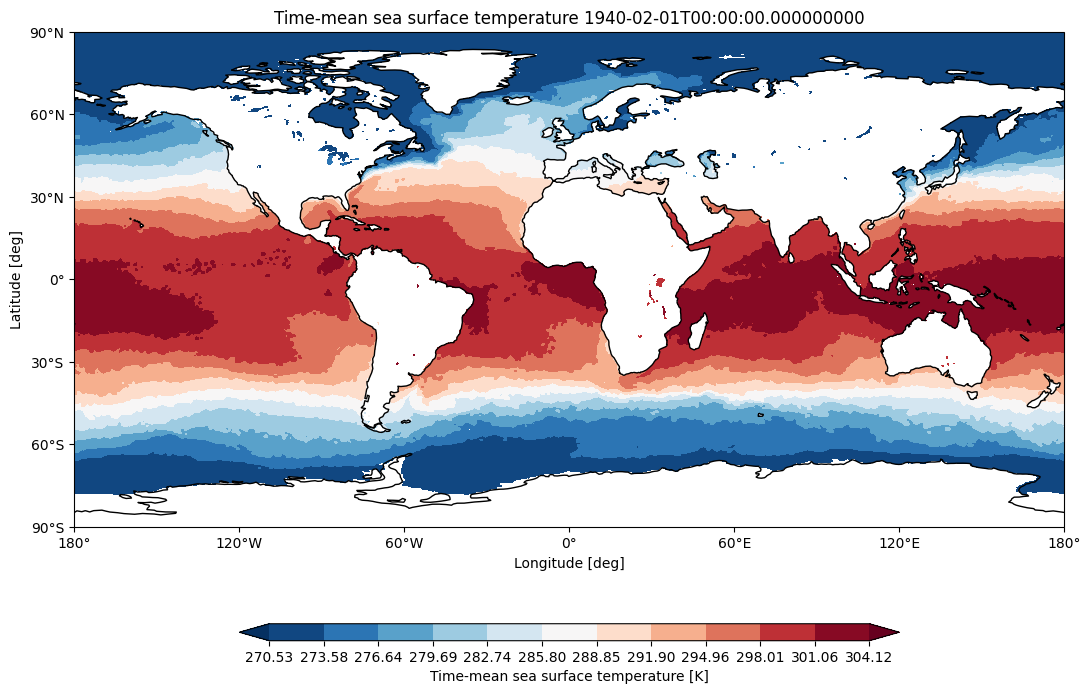

In [6]:
plot_single_map(avg_tos_plot)

If nothing but the data is provided, the utility will plot the data on a map and adapt colorbar, title, etc. to the data.
The function is loading data in memory and applying a check if lon data have an empty central point to be fixed.

A custom title can be provided:

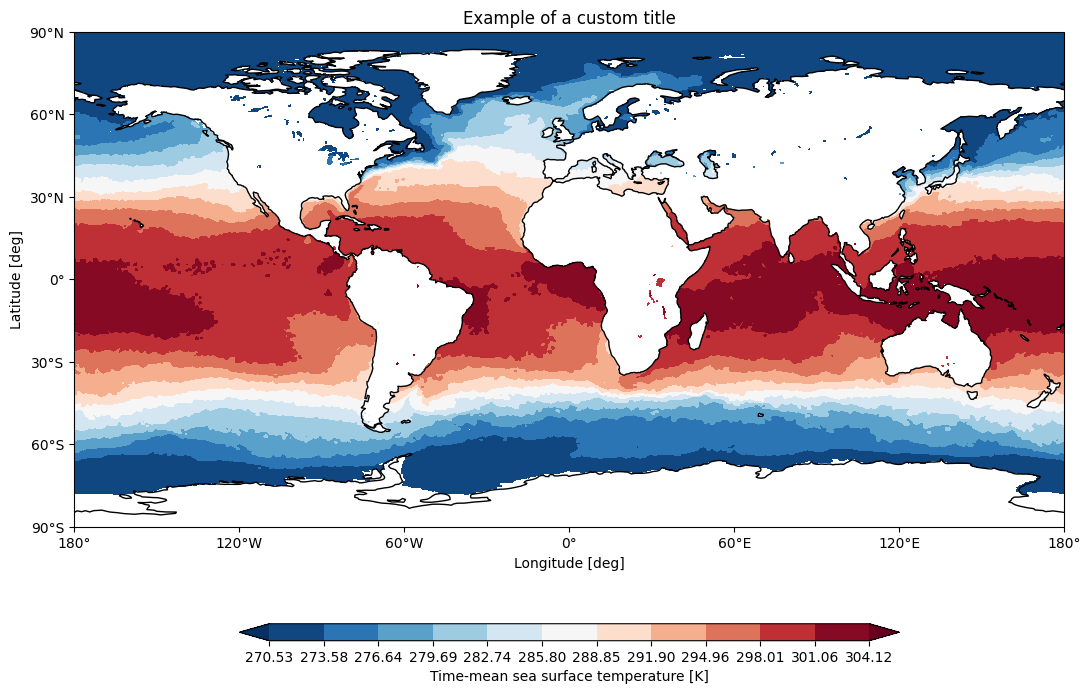

In [7]:
plot_single_map(avg_tos_plot, title="Example of a custom title")

The function can also save the plot with a custom filename and output directory, with custom format (the format will be added automatically) and dpi.
The save function has to be enabled with `save=True`:

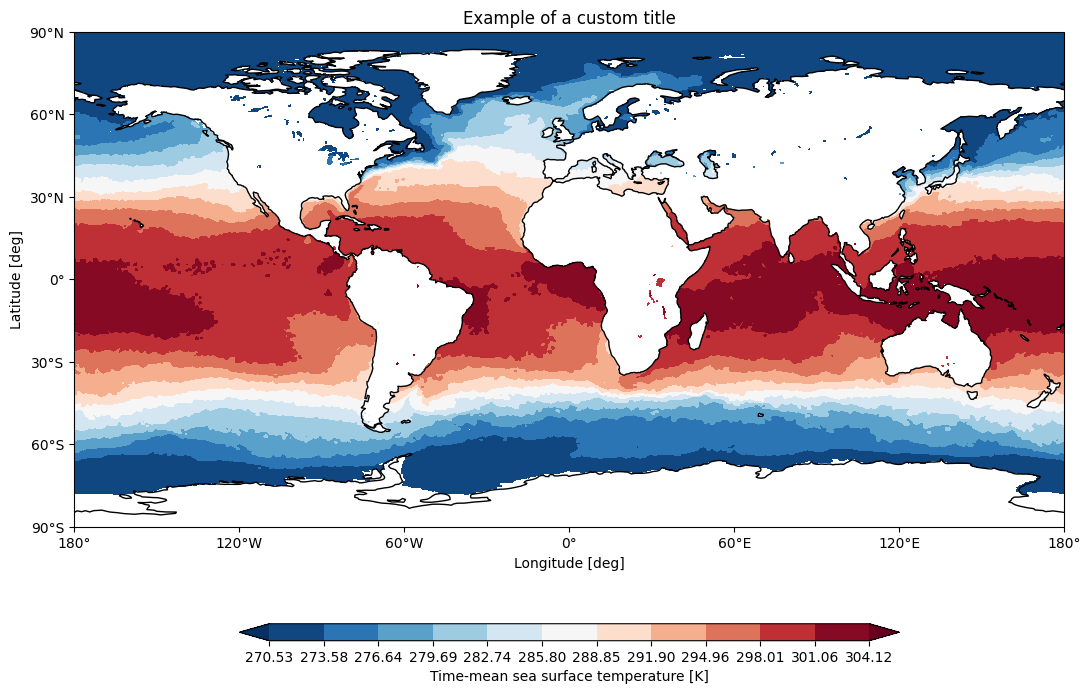

In [8]:
plot_single_map(avg_tos_plot, title="Example of a custom title", filename="example", outputdir=".", format="png", dpi=300, save=True)

The minimum and maximum values can be provided and the possibility to choose to symmetrize the colorbar around zero is available.
If the symmetrize option is enabled, the minimum and maximum values are ignored if provided:

2024-02-16 18:04:44 :: plot_single_map :: DEBUG    -> Updating the log_level to DEBUG
2024-02-16 18:04:44 :: plot_single_map :: INFO     -> Loading data in memory
2024-02-16 18:04:44 :: plot_single_map :: INFO     -> Adding cyclic longitude
2024-02-16 18:04:44 :: plot_single_map :: DEBUG    -> Setting figsize to (11, 8.5)
2024-02-16 18:04:44 :: plot_single_map :: DEBUG    -> Setting vmin to 250, vmax to 320
2024-02-16 18:04:46 :: plot_single_map :: DEBUG    -> Adding coastlines
2024-02-16 18:04:46 :: set_ticks :: DEBUG    -> Updating the log_level to DEBUG
2024-02-16 18:04:46 :: set_ticks :: DEBUG    -> Setting longitude ticks from -180 to 180
2024-02-16 18:04:46 :: set_ticks :: DEBUG    -> Setting longitude ticks to [-180. -120.  -60.    0.   60.  120.  180.]
2024-02-16 18:04:46 :: set_ticks :: DEBUG    -> Setting latitude ticks from -90.0 to 90.0
2024-02-16 18:04:46 :: set_ticks :: DEBUG    -> Setting latitude ticks to [-90. -60. -30.   0.  30.  60.  90.]
2024-02-16 18:04:46 :: cbar 

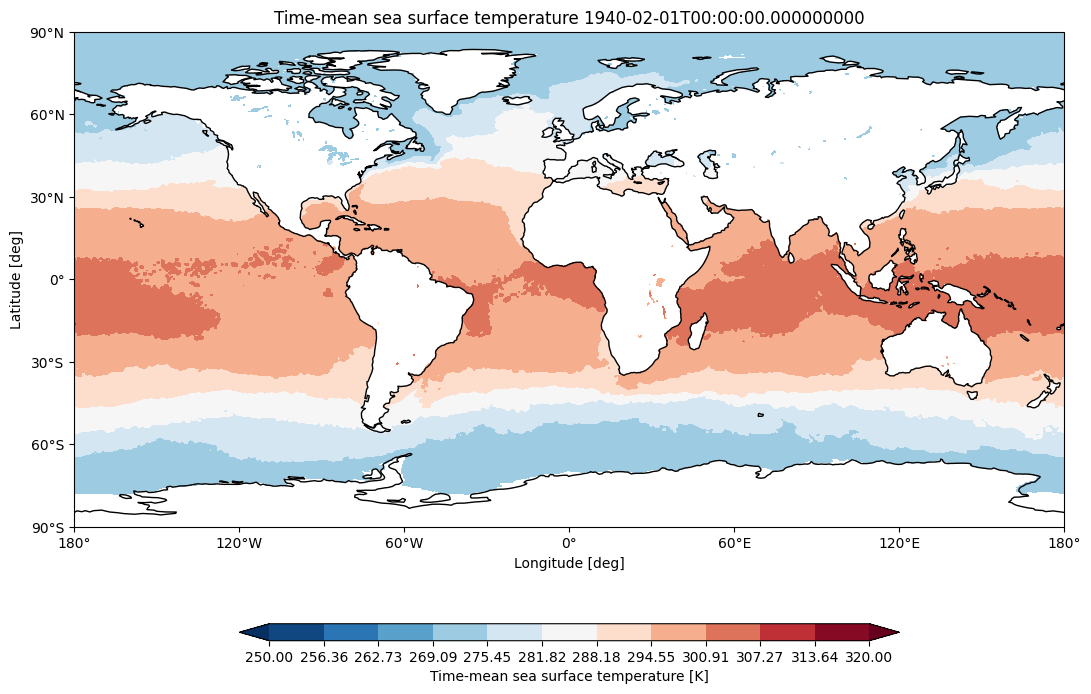

In [9]:
plot_single_map(avg_tos_plot, vmin=250, vmax=320, loglevel="DEBUG")

As can be seen above contourplot is the standard representation (a number of levels can be provided), but pcolormesh is also available:

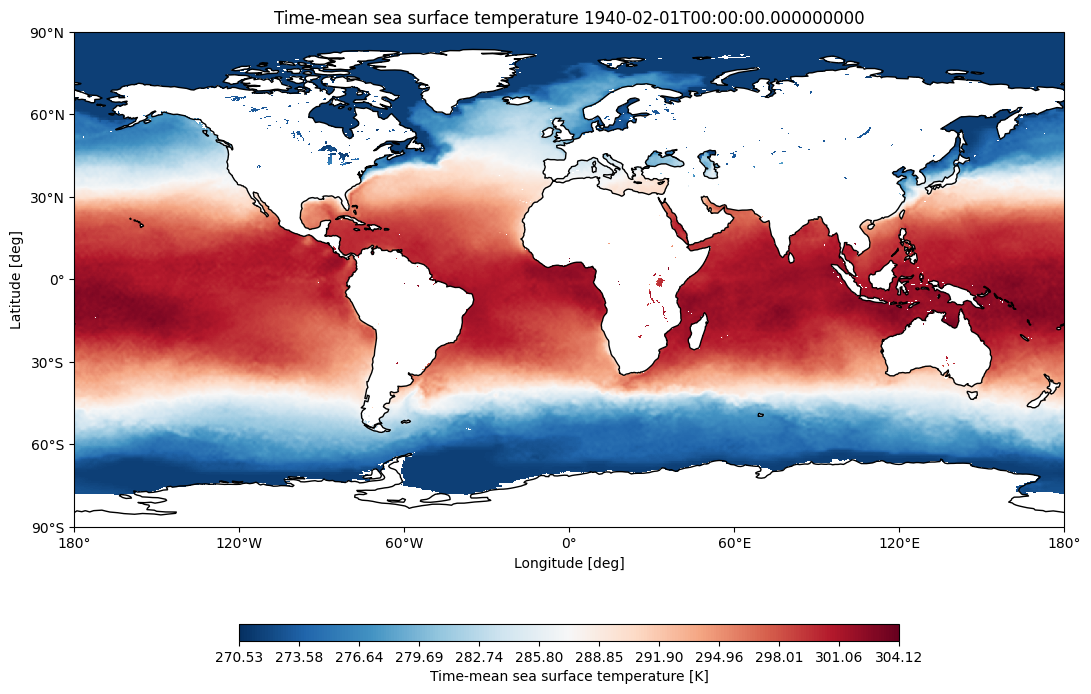

In [10]:
plot_single_map(avg_tos_plot, contour=False)

It is also possible to change colormap and add gridlines:

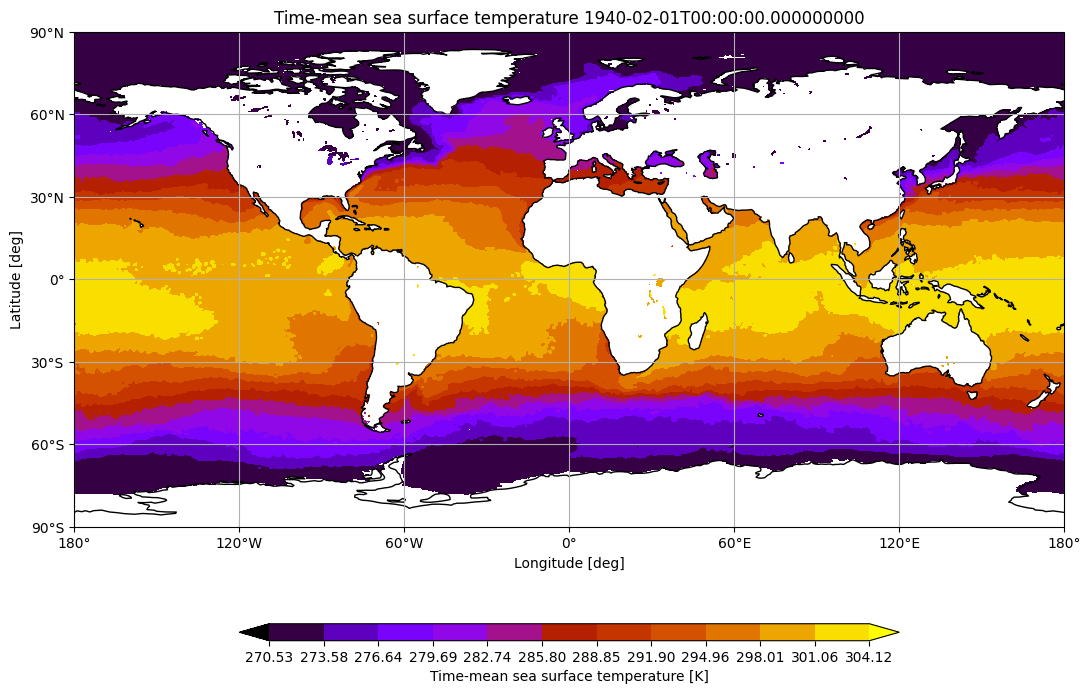

In [11]:
plot_single_map(avg_tos_plot, cmap="gnuplot", gridlines=True)

## Area selection for a plot

It is possible to use the function and the utilities to plot a specific area of the globe.
The function to perform the area selection is available in the `utils` module.
Let's focus on the Nina3.4 region:

In [12]:
from aqua.util import area_selection

In [13]:
# Nino 3.4 region
lon_lim = (-170, -120)
lat_lim = (-5, 5)

avg_tos_sel = area_selection(avg_tos_plot, lon=lon_lim, lat=lat_lim)

We can analyze the data in the region. The area selection function by default is not dropping the data outside the region, so that a simple call to the plotting function will plot the data in the region and white elsewhere:

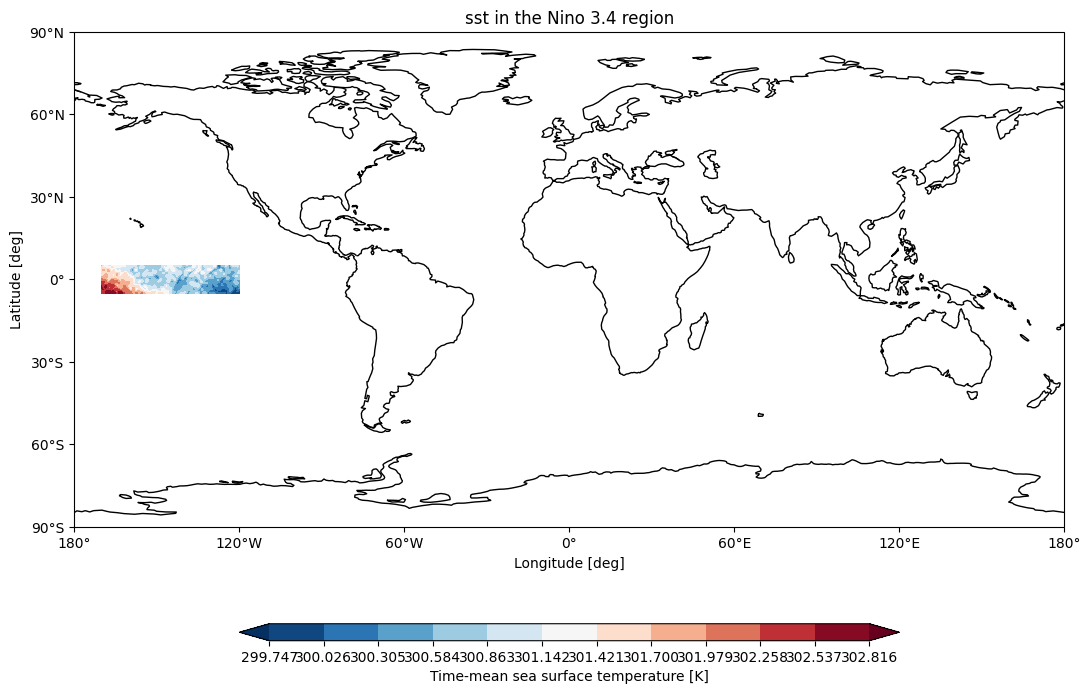

In [18]:
plot_single_map(avg_tos_sel, title='sst in the Nino 3.4 region')

We need to drop the value outside the region. This can be done with the `drop=True` parameter in the area selection function:

In [15]:
avg_tos_sel_box = area_selection(avg_tos_plot, lon=lon_lim, lat=lat_lim, drop=True)
avg_tos_sel_box

<xarray.DataArray 'avg_tos' (lat: 41, lon: 201)>
array([[302.4746 , 302.47266, 302.4795 , ..., 299.8369 , 299.8623 ,
        299.8662 ],
       [302.4629 , 302.4619 , 302.4707 , ..., 299.88672, 299.86523,
        299.86426],
       [302.49512, 302.49512, 302.49902, ..., 299.97363, 299.95117,
        299.92773],
       ...,
       [301.48242, 301.43848, 301.32617, ..., 300.85156, 300.8545 ,
        300.8086 ],
       [301.62305, 301.45703, 301.33984, ..., 300.88672, 300.8213 ,
        300.7744 ],
       [301.7627 , 301.59277, 301.42285, ..., 300.90137, 300.833  ,
        300.74902]], dtype=float32)
Coordinates:
    time     datetime64[ns] 1940-02-01
  * lat      (lat) float64 -5.0 -4.75 -4.5 -4.25 -4.0 ... 4.0 4.25 4.5 4.75 5.0
  * lon      (lon) float64 190.0 190.2 190.5 190.8 ... 239.2 239.5 239.8 240.0
Attributes:
    long_name:  Time-mean sea surface temperature
    units:      K
    code:       34
    table:      128
    history:    \n2024-02-16 18:04:34 AQUA💧: Variable renamed avg_tos by fixe...
    paramId:    263101
    cfVarName:  avg_tos
    shortName:  avg_tos

We unset the figsize to use the default one and we change the number of standard yticks.

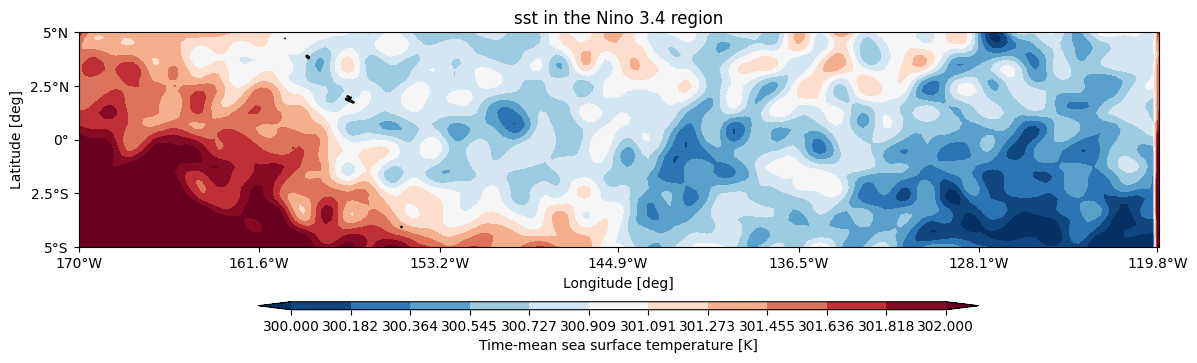

In [22]:
plot_single_map(avg_tos_sel_box, title='sst in the Nino 3.4 region', figsize=(12,4), nyticks=5, vmin=300, vmax=302)